In [67]:
import pandas as pd
df_business = pd.read_excel("Main-BOB-Aflac.xlsx")
df_business

In [31]:
grps = ['12mo Grps', '15mo Grps', '18mo Grps', 
        '21mo Grps', '24mo Grps',  '36mo Grps', 
        '48mo Grps', '60mo Grps'
        ]
grps


['12mo Grps',
 '15mo Grps',
 '18mo Grps',
 '21mo Grps',
 '24mo Grps',
 '36mo Grps',
 '48mo Grps',
 '60mo Grps']

In [32]:
print(grps)
choose_grp = str(input("Select group from above: "))

['12mo Grps', '15mo Grps', '18mo Grps', '21mo Grps', '24mo Grps', '36mo Grps', '48mo Grps', '60mo Grps']
Select group from above: 12mo Grps


In [35]:
choose_grp

'12mo Grps'

In [53]:
df_grp_0 = df[df[choose_grp] == 0]
df_grp_1 = df[df[choose_grp] == 1]

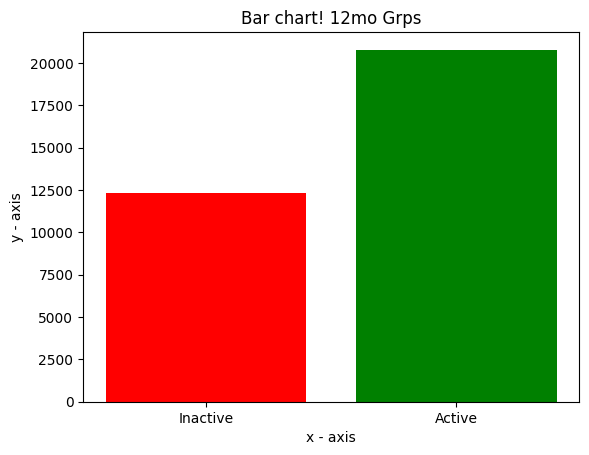

In [72]:
## Plotting the graph
import matplotlib.pyplot as plt
  
# heights of bars
height = [len(df_grp_0), len(df_grp_1)]
  
# labels for bars
tick_label = ['Inactive', 'Active']
  
# plotting a bar chart
plt.bar(left, height, tick_label = tick_label,
        width = 0.8, color = ['red', 'green'])
  
# naming the x-axis
plt.xlabel('x - axis')
# naming the y-axis
plt.ylabel('y - axis')
# plot title
plt.title(f'Bar chart! {choose_grp}')
  
# function to show the plot
plt.show()

In [157]:
## using pgeocode api to calculate distance between two zip codes
import pgeocode
dist = pgeocode.GeoDistance('US')
# result = dist.query_postal_code('94124', '95472')

In [144]:
## filtering on distance
df_zip_code = df_grp_0.reset_index()
new_list = list()
for i in range(len(df_zip_code)):
    if dist.query_postal_code(int(df_zip_code.loc[i, "Zip"]), '95472') < 20:
        new_list.append(df_zip_code.loc[i])

In [154]:
filtered_zip_df = pd.DataFrame (new_list, columns = list(df_zip_code))
filtered_zip_df

,index,Territory,Svc Market,Group Number,MKD CID,RSC CID,DSC CID,Agent CID,OSA CID,SFD YR,...,PS_Ind,Group Type,Group Name,Aflac Group Number,Account Tenure (Yrs),Lvl01=Lvl40,Lvl01=Lvl50,Any Lvl = Lvl01,CountyState,CityState
1168,2867,SOUTHWEST,CA-N/NV-N,M4624,NaN,NaN,NaN,NaN,NaN,2021,...,N,PAYROLL,EXCHANGE BANK,-,22,0,0,1,"SONOMA, CA","SANTA ROSA, CA"
1169,2868,SOUTHWEST,CA-N/NV-N,ASW99,NaN,NaN,NaN,NaN,NaN,2021,...,N,PAYROLL,BURBANK HOUSING PROPERTY,-,13,0,0,1,"SONOMA, CA","SANTA ROSA, CA"
1194,2922,SOUTHWEST,CA-N/NV-N,AC009,NaN,NaN,NaN,NaN,NaN,2022,...,N,PAYROLL,PARK AVENUE CATERING LLC,-,19,0,0,0,"SONOMA, CA","COTATI, CA"
1195,2923,SOUTHWEST,CA-N/NV-N,AH833,NaN,NaN,NaN,NaN,NaN,2021,...,N,PAYROLL,TIERRA CAST,-,19,0,0,0,"SONOMA, CA","SANTA ROSA, CA"
1204,2936,SOUTHWEST,CA-N/NV-N,DS657,NaN,NaN,NaN,NaN,NaN,2021,...,N,PAYROLL,HARKEY CONSTRUCTION INC,-,18,0,0,0,"SONOMA, CA","WINDSOR, CA"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1628,4301,SOUTHWEST,CA-N/NV-N,L0K28,NaN,NaN,NaN,NaN,NaN,2021,...,N,PAYROLL,FACTORY POWERSPORTS,-,3,0,0,0,"SONOMA, CA","SANTA ROSA, CA"
1631,4309,SOUTHWEST,CA-N/NV-N,PHW00,NaN,NaN,NaN,NaN,NaN,2021,...,N,PAYROLL,COOKIE CUTTERS HAIRCUTS,-,0,0,0,0,"SONOMA, CA","KENWOOD, CA"
1856,4778,SOUTHWEST,CA-N/NV-N,XX833,NaN,NaN,NaN,NaN,NaN,2021,...,N,PAYROLL,VANTREO INSURANCE BROKERAG,-,14,1,0,1,"SONOMA, CA","SANTA ROSA, CA"
1973,5036,SOUTHWEST,CA-N/NV-N,L1Z84,NaN,NaN,NaN,NaN,NaN,2021,...,N,PAYROLL,THE LAW OFFICES OF MAX G,-,3,0,0,1,"SONOMA, CA","SANTA ROSA, CA"


In [156]:
## filtering on employee count
filtered_emp_count = filtered_zip_df[filtered_zip_df["EE Ct"] > 50]
filtered_emp_count

,index,Territory,Svc Market,Group Number,MKD CID,RSC CID,DSC CID,Agent CID,OSA CID,SFD YR,...,PS_Ind,Group Type,Group Name,Aflac Group Number,Account Tenure (Yrs),Lvl01=Lvl40,Lvl01=Lvl50,Any Lvl = Lvl01,CountyState,CityState
1168,2867,SOUTHWEST,CA-N/NV-N,M4624,NaN,NaN,NaN,NaN,NaN,2021,...,N,PAYROLL,EXCHANGE BANK,-,22,0,0,1,"SONOMA, CA","SANTA ROSA, CA"
1169,2868,SOUTHWEST,CA-N/NV-N,ASW99,NaN,NaN,NaN,NaN,NaN,2021,...,N,PAYROLL,BURBANK HOUSING PROPERTY,-,13,0,0,1,"SONOMA, CA","SANTA ROSA, CA"
1207,2944,SOUTHWEST,CA-N/NV-N,95754,NaN,NaN,NaN,NaN,NaN,2022,...,N,PAYROLL,GEORGE PETERSEN INS,-,27,0,0,1,"SONOMA, CA","SANTA ROSA, CA"
1232,3015,SOUTHWEST,CA-N/NV-N,F6501,NaN,NaN,NaN,NaN,NaN,2022,...,N,PAYROLL,AHLBORN FENCE STEEL INC,-,25,0,0,0,"SONOMA, CA","SANTA ROSA, CA"
1234,3017,SOUTHWEST,CA-N/NV-N,A3374,NaN,NaN,NaN,NaN,NaN,2022,...,N,PAYROLL,SUMMIT STATE BANK,-,27,0,0,0,"SONOMA, CA","SANTA ROSA, CA"
1238,3028,SOUTHWEST,CA-N/NV-N,ZF479,NaN,NaN,NaN,NaN,NaN,2021,...,N,PAYROLL,PRIMROSE ALZHEIMER LIVING,-,14,0,0,1,"SONOMA, CA","SANTA ROSA, CA"
1271,3134,SOUTHWEST,CA-N/NV-N,HKG22,NaN,NaN,NaN,NaN,NaN,2022,...,N,PAYROLL,ADBAR LLC,-,7,0,0,0,"SONOMA, CA","WINDSOR, CA"
1272,3135,SOUTHWEST,CA-N/NV-N,ZN309,NaN,NaN,NaN,NaN,NaN,2021,...,N,PAYROLL,GARRETT HARDWARE AND,-,13,0,0,0,"SONOMA, CA","WINDSOR, CA"
1290,3184,SOUTHWEST,CA-N/NV-N,84699,NaN,NaN,NaN,NaN,NaN,2022,...,N,PAYROLL,SMOTHERS & WHITE INC,-,28,0,0,1,"SONOMA, CA","SANTA ROSA, CA"
1291,3186,SOUTHWEST,CA-N/NV-N,PMN62,NaN,NaN,NaN,NaN,NaN,2021,...,N,PAYROLL,FAIRWEATHER AND ASSOCIATES,-,0,0,0,1,"SONOMA, CA","SANTA ROSA, CA"
